# ***Importing all the necessary libraries***




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/All datasets.zip (Unzipped Files)/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Data Preprocessing**
Dropping of the rows where there are missing values

In [ ]:
# Drop rows with 0 or missing values in specific columns
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
data = data.dropna(subset=columns_to_check, how='any')
data = data[(data[columns_to_check] != 0).all(axis=1)]

# Print the updated shape of the dataset
print("Updated dataset shape:", data.shape)
data

Updated dataset shape: (532, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


# **Exploratory Data Analysis (EDA)**
It is an approach that is used to analyze the data and discover trends, patterns, or check assumptions in data with the help of statistical summaries and graphical representations.

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
6            3       78             50             32       88  31.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
3                     0.167   21        0  
4                     2.288   33        1  
6                     0.248   26        1  


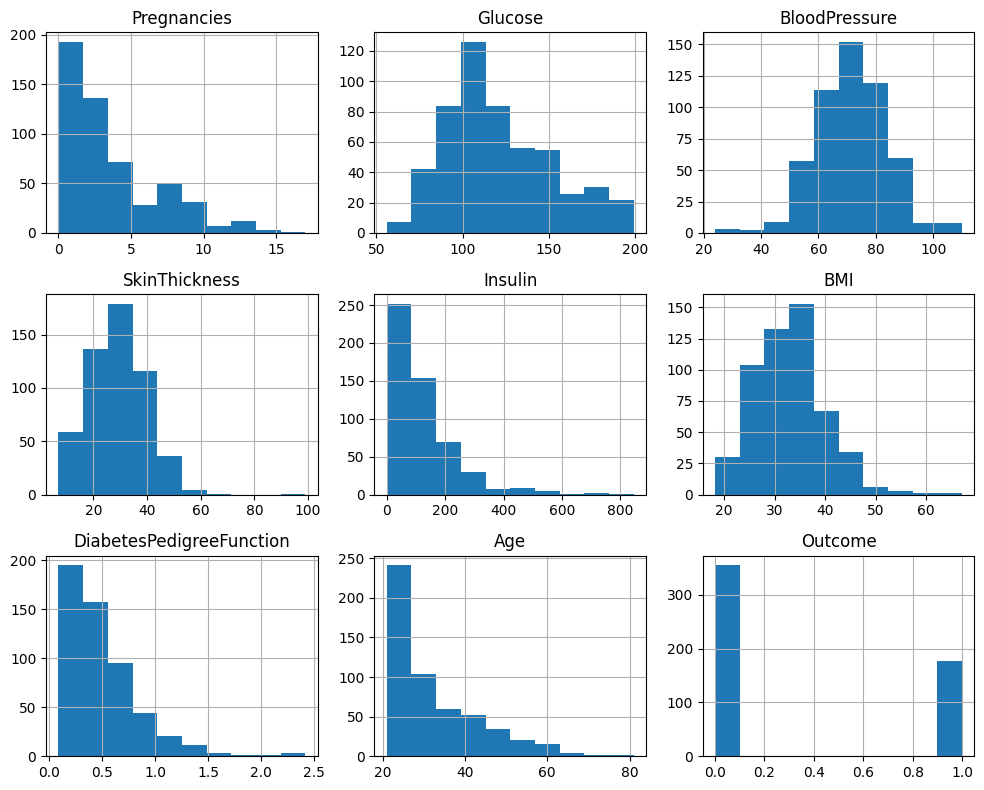

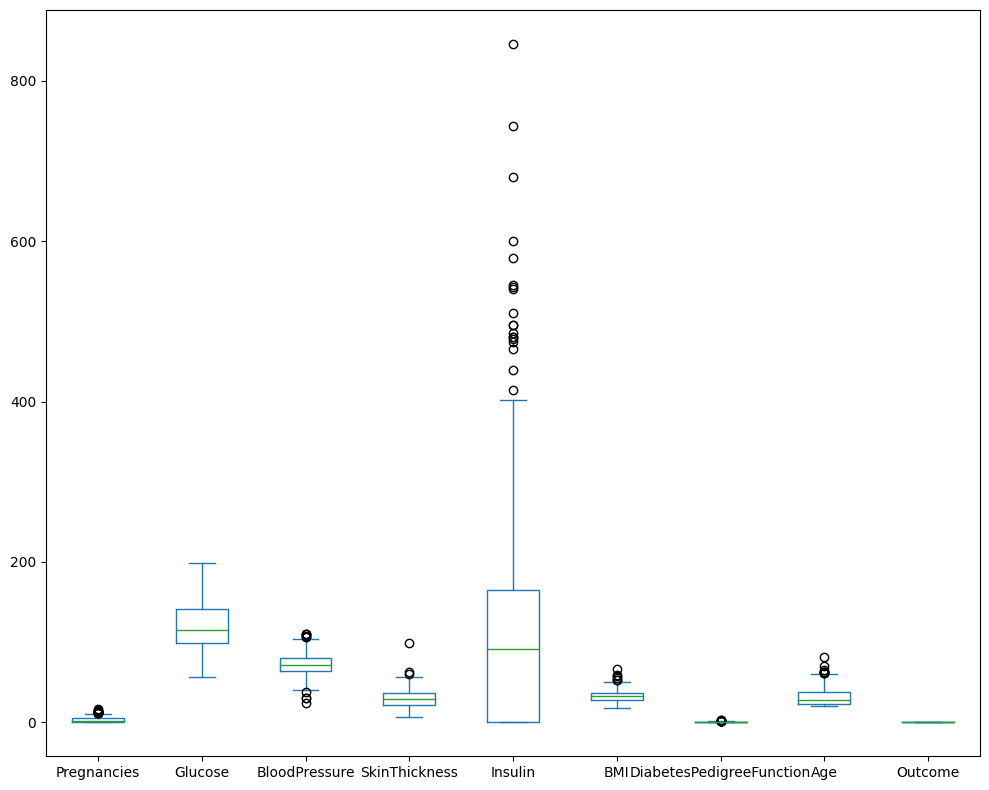

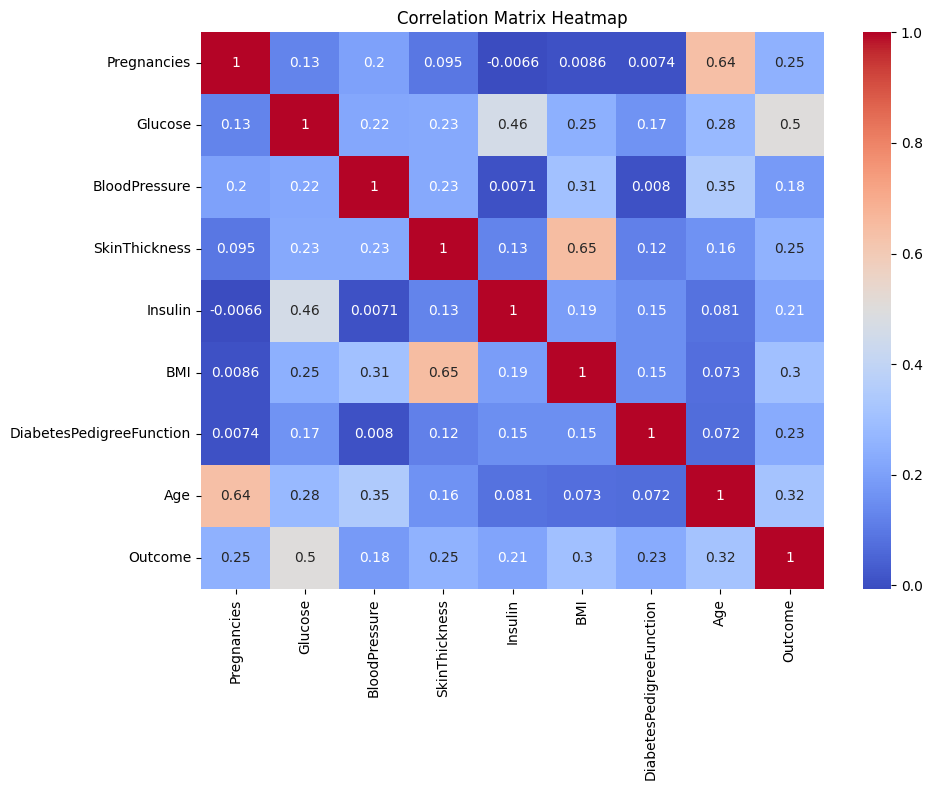

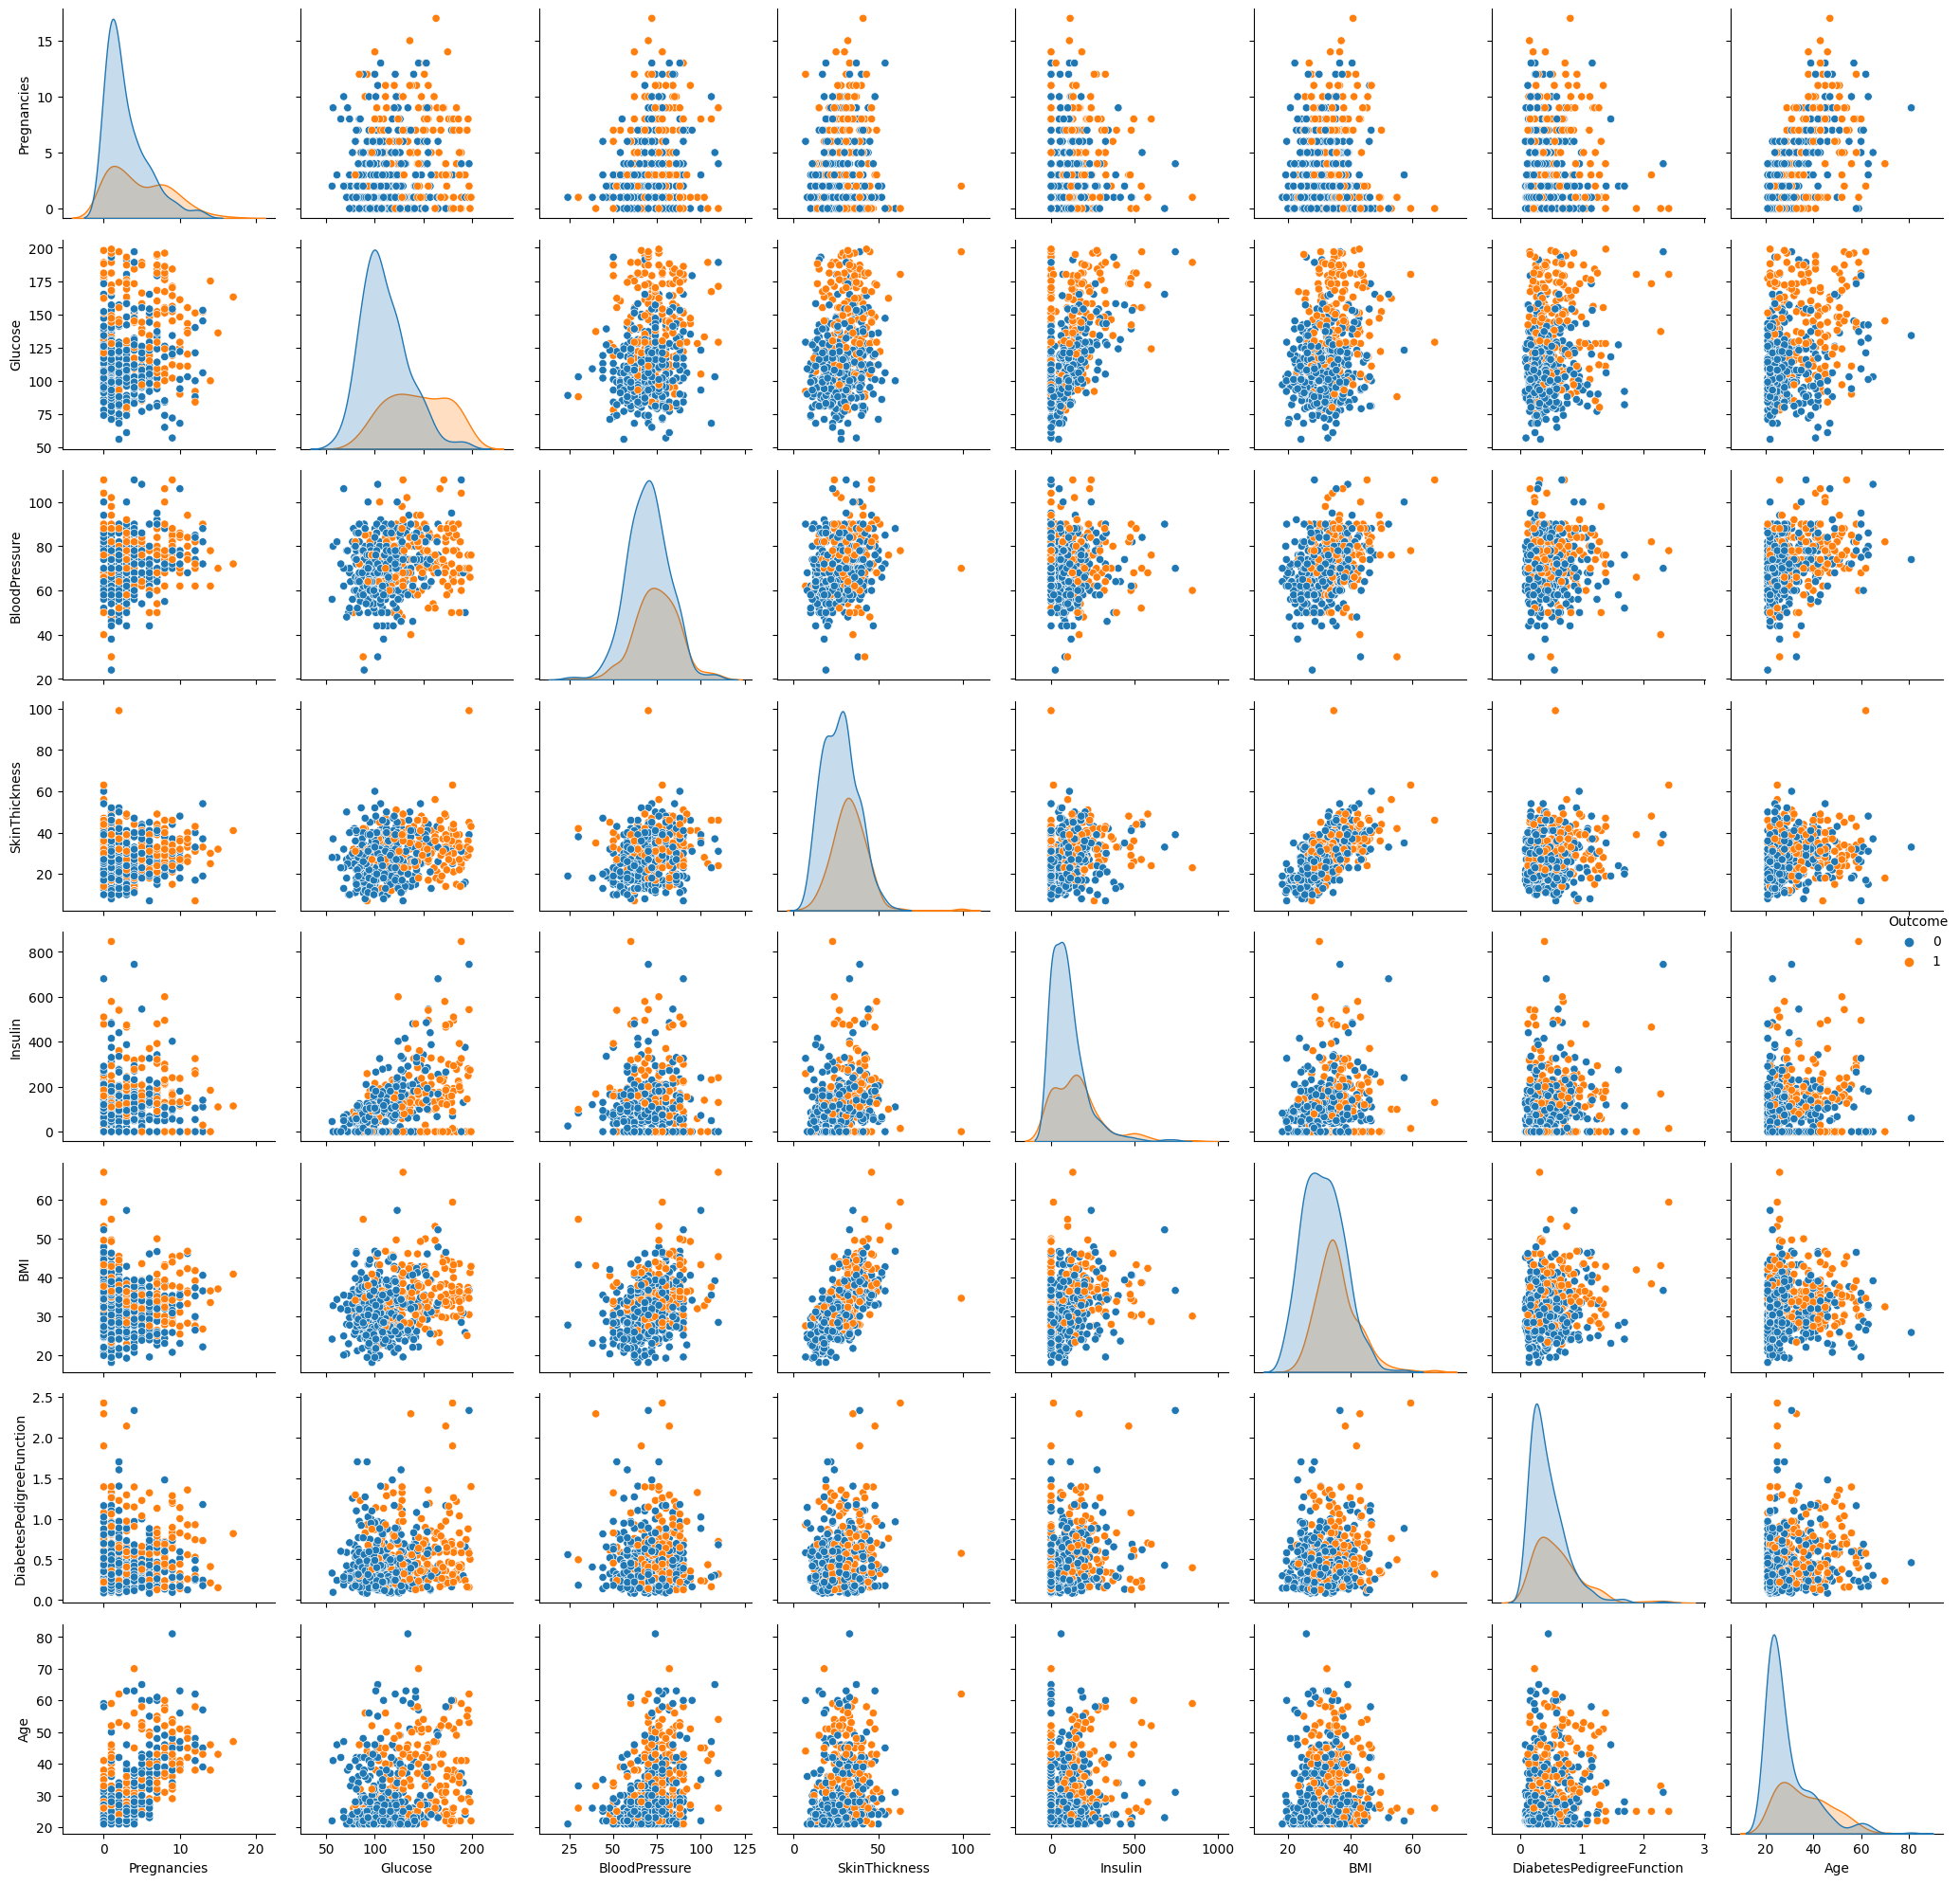

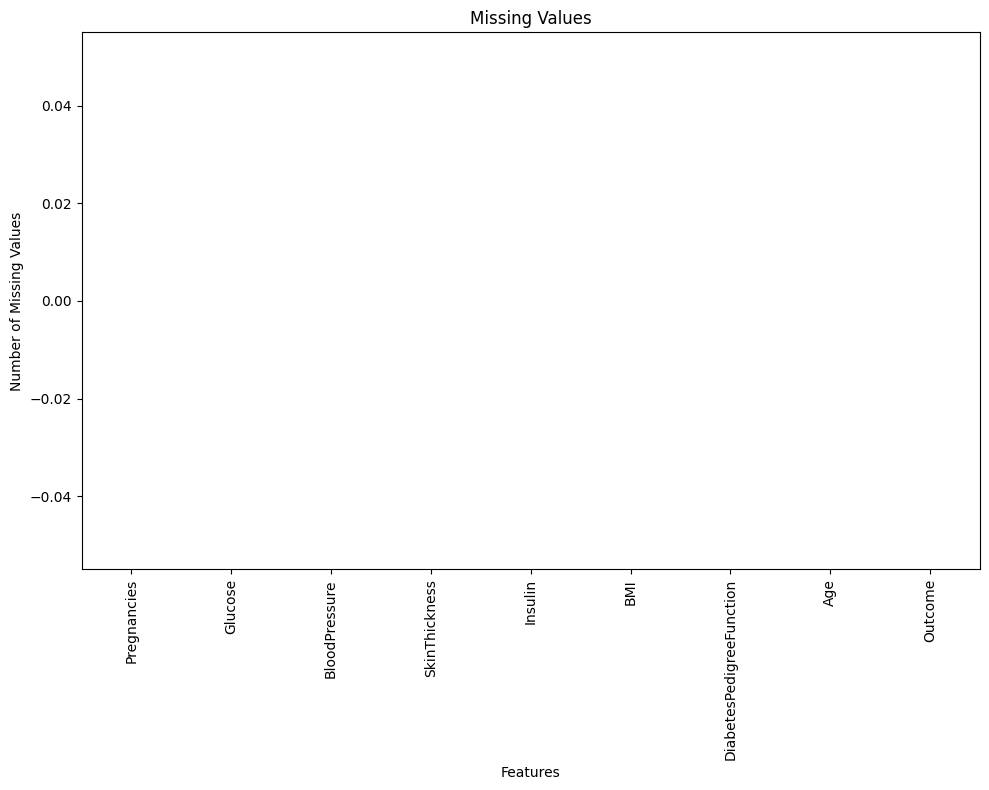

In [ ]:
# Load the dataset
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Data distribution visualization
# Histograms
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Box plots
data.plot(kind='box', figsize=(10, 8))
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Pairwise scatter plots
sns.pairplot(data, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome')
plt.tight_layout()
plt.show()

# Missing values visualization
missing_values = data.isnull().sum()
missing_values.plot(kind='bar', figsize=(10, 8))
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values')
plt.tight_layout()
plt.show()


# **Data Description**
The describe() method returns description of the data in the DataFrame.
If the DataFrame contains numerical data, the description contains these information for each column:

*   count - The number of not-empty values.
*   mean - The average (mean) value.
*   std - The standard deviation.
*   min - the minimum value.
*   25% - The 25% percentile.
*   50% - The 50% percentile.
*   75% - The 75% percentile.
*   max - the maximum value.

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.516917,121.030075,71.505639,29.182331,114.988722,32.890226,0.502966,31.614662,0.332707
std,3.312036,30.999226,12.310253,10.523878,123.007555,6.881109,0.344546,10.761584,0.471626
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,0.000000,27.875000,0.258750,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,91.500000,32.800000,0.416000,28.000000,0.000000
75%,5.000000,141.250000,80.000000,36.000000,165.250000,36.900000,0.658500,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               532 non-null    int64  
 1   Glucose                   532 non-null    int64  
 2   BloodPressure             532 non-null    int64  
 3   SkinThickness             532 non-null    int64  
 4   Insulin                   532 non-null    int64  
 5   BMI                       532 non-null    float64
 6   DiabetesPedigreeFunction  532 non-null    float64
 7   Age                       532 non-null    int64  
 8   Outcome                   532 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 41.6 KB


# **Spliting of the data**

In [ ]:
from sklearn.model_selection import train_test_split

# Load the dataset
# Split the data into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (425, 8) (425,)
Test set shape: (107, 8) (107,)


In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
580,0,151,90,46,0,42.1,0.371,21
649,0,107,60,25,0,26.4,0.133,23
450,1,82,64,13,95,21.2,0.415,23
211,0,147,85,54,0,42.8,0.375,24
...,...,...,...,...,...,...,...,...
109,0,95,85,25,36,37.4,0.247,24
159,17,163,72,41,114,40.9,0.817,47
393,4,116,72,12,87,22.1,0.463,37
629,4,94,65,22,0,24.7,0.148,21


In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
13,1,189,60,23,846,30.1,0.398,59
709,2,93,64,32,160,38.0,0.674,23
157,1,109,56,21,135,25.2,0.833,23
705,6,80,80,36,0,39.8,0.177,28
650,1,91,54,25,100,25.2,0.234,23
...,...,...,...,...,...,...,...,...
259,11,155,76,28,150,33.3,1.353,51
442,4,117,64,27,120,33.2,0.230,24
767,1,93,70,31,0,30.4,0.315,23
549,4,189,110,31,0,28.5,0.680,37


In [ ]:
y_train

432    0
580    1
649    0
450    0
211    0
      ..
109    1
159    1
393    0
629    0
155    1
Name: Outcome, Length: 425, dtype: int64

In [ ]:
y_test

13     1
709    1
157    0
705    0
650    0
      ..
259    1
442    0
767    0
549    0
726    0
Name: Outcome, Length: 107, dtype: int64

# **MODELS**

In [ ]:
#MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# **Function that defines the evaluation metrics**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report as cls_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

def evaluate(y_test, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    class_report = cls_report(y_test, y_pred, target_names=['Diabetes -ve', 'Diabetes +ve'])
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy     :", accuracy)
    print("Precision    :", precision)
    print("Recall       :", recall)
    print("F1 Score     :", f1)
    print("ROC AUC Score:", roc_auc)
    print("\nClassification Report:")
    print(class_report)
    print("Confusion Matrix:")
    print("                      Predicted")
    print("               |  Diabetes +ve  |  Diabetes -ve")
    print("==============================================")
    print("  Diabetes +ve |      {}        |      {}".format(confusion_mat[1, 1], confusion_mat[1, 0]))
    print("  Diabetes -ve |      {}         |      {}".format(confusion_mat[0, 1], confusion_mat[0, 0]))


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Print the evaluation metrics
  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Mean Absolute Error (MAE):", mae)
  print("R-squared (R2) Score:", r2)

# **Logistic Regression**

In [ ]:
# Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increase the maximum number of iterations
logreg.fit(X_train, y_train.values.ravel())  # Convert y_train to a 1D array

# Make predictions on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
evaluate(y_test, y_pred, y_prob)

Accuracy     : 0.822429906542056
Precision    : 0.7333333333333333
Recall       : 0.6666666666666666
F1 Score     : 0.6984126984126984
ROC AUC Score: 0.8767403767403767

Classification Report:
              precision    recall  f1-score   support

Diabetes -ve       0.86      0.89      0.87        74
Diabetes +ve       0.73      0.67      0.70        33

    accuracy                           0.82       107
   macro avg       0.80      0.78      0.79       107
weighted avg       0.82      0.82      0.82       107

Confusion Matrix:
                      Predicted
               |  Diabetes +ve  |  Diabetes -ve
  Diabetes +ve |      22        |      11
  Diabetes -ve |      8         |      66


# **Linear Regression**

In [ ]:
# Create and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate RMSE
evaluation(y_test, y_pred)

Mean Squared Error (MSE): 0.13060809267695792
Root Mean Squared Error (RMSE): 0.3613974165333199
Mean Absolute Error (MAE): 0.2985617452374858
R-squared (R2) Score: 0.3876609119334601


# **Random Forest Classifier**

In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
evaluate(y_test, y_pred, y_prob)

Accuracy     : 0.8037383177570093
Precision    : 0.7142857142857143
Recall       : 0.6060606060606061
F1 Score     : 0.6557377049180327
ROC AUC Score: 0.8480753480753481

Classification Report:
              precision    recall  f1-score   support

Diabetes -ve       0.84      0.89      0.86        74
Diabetes +ve       0.71      0.61      0.66        33

    accuracy                           0.80       107
   macro avg       0.77      0.75      0.76       107
weighted avg       0.80      0.80      0.80       107

Confusion Matrix:
                      Predicted
               |  Diabetes +ve  |  Diabetes -ve
  Diabetes +ve |      20        |      13
  Diabetes -ve |      8         |      66


# **Gradient Boosting Classifier**

In [ ]:
# Create and train the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
evaluate(y_test, y_pred, y_prob)

Accuracy     : 0.7757009345794392
Precision    : 0.6551724137931034
Recall       : 0.5757575757575758
F1 Score     : 0.6129032258064515
ROC AUC Score: 0.8366093366093366

Classification Report:
              precision    recall  f1-score   support

Diabetes -ve       0.82      0.86      0.84        74
Diabetes +ve       0.66      0.58      0.61        33

    accuracy                           0.78       107
   macro avg       0.74      0.72      0.73       107
weighted avg       0.77      0.78      0.77       107

Confusion Matrix:
                      Predicted
               |  Diabetes +ve  |  Diabetes -ve
  Diabetes +ve |      19        |      14
  Diabetes -ve |      10         |      64


# **Support Vector Classifier(SVC)**

In [ ]:
# Create and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
evaluate(y_test, y_pred, y_prob)

Accuracy     : 0.794392523364486
Precision    : 0.72
Recall       : 0.5454545454545454
F1 Score     : 0.6206896551724138
ROC AUC Score: 0.8366093366093366

Classification Report:
              precision    recall  f1-score   support

Diabetes -ve       0.82      0.91      0.86        74
Diabetes +ve       0.72      0.55      0.62        33

    accuracy                           0.79       107
   macro avg       0.77      0.73      0.74       107
weighted avg       0.79      0.79      0.79       107

Confusion Matrix:
                      Predicted
               |  Diabetes +ve  |  Diabetes -ve
  Diabetes +ve |      18        |      15
  Diabetes -ve |      7         |      67


# **Multi-Layer Perceptron Classifier**

In [ ]:
# Create and train the Neural Network model with backpropagation
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nn_model.predict(X_test)
y_prob = nn_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
evaluate(y_test, y_pred, y_prob)

Accuracy     : 0.7009345794392523
Precision    : 0.5263157894736842
Recall       : 0.30303030303030304
F1 Score     : 0.38461538461538464
ROC AUC Score: 0.7002457002457003

Classification Report:
              precision    recall  f1-score   support

Diabetes -ve       0.74      0.88      0.80        74
Diabetes +ve       0.53      0.30      0.38        33

    accuracy                           0.70       107
   macro avg       0.63      0.59      0.59       107
weighted avg       0.67      0.70      0.67       107

Confusion Matrix:
                      Predicted
               |  Diabetes +ve  |  Diabetes -ve
  Diabetes +ve |      10        |      23
  Diabetes -ve |      9         |      65


# **Decision Tree Classifier**

In [ ]:
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
evaluate(y_test, y_pred, y_prob)

Accuracy     : 0.7102803738317757
Precision    : 0.5263157894736842
Recall       : 0.6060606060606061
F1 Score     : 0.5633802816901409
ROC AUC Score: 0.6814086814086815

Classification Report:
              precision    recall  f1-score   support

Diabetes -ve       0.81      0.76      0.78        74
Diabetes +ve       0.53      0.61      0.56        33

    accuracy                           0.71       107
   macro avg       0.67      0.68      0.67       107
weighted avg       0.72      0.71      0.72       107

Confusion Matrix:
                      Predicted
               |  Diabetes +ve  |  Diabetes -ve
  Diabetes +ve |      20        |      13
  Diabetes -ve |      18         |      56


# **Naïve Bayes classifier**

In [ ]:
# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
evaluate(y_test, y_pred, y_prob)

Accuracy     : 0.7757009345794392
Precision    : 0.6153846153846154
Recall       : 0.7272727272727273
F1 Score     : 0.6666666666666667
ROC AUC Score: 0.8525798525798527

Classification Report:
              precision    recall  f1-score   support

Diabetes -ve       0.87      0.80      0.83        74
Diabetes +ve       0.62      0.73      0.67        33

    accuracy                           0.78       107
   macro avg       0.74      0.76      0.75       107
weighted avg       0.79      0.78      0.78       107

Confusion Matrix:
                      Predicted
               |  Diabetes +ve  |  Diabetes -ve
  Diabetes +ve |      24        |      9
  Diabetes -ve |      15         |      59


# **K Neighbors Classifier**

In [ ]:
# Split the dataset into features and target variable

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Evaluate the model
evaluate(y_test, y_pred, y_prob)

Accuracy     : 0.7383177570093458
Precision    : 0.5714285714285714
Recall       : 0.6060606060606061
F1 Score     : 0.588235294117647
ROC AUC Score: 0.7604422604422605

Classification Report:
              precision    recall  f1-score   support

Diabetes -ve       0.82      0.80      0.81        74
Diabetes +ve       0.57      0.61      0.59        33

    accuracy                           0.74       107
   macro avg       0.70      0.70      0.70       107
weighted avg       0.74      0.74      0.74       107

Confusion Matrix:
                      Predicted
               |  Diabetes +ve  |  Diabetes -ve
  Diabetes +ve |      20        |      13
  Diabetes -ve |      15         |      59


# **Polynomial Regression**

In [ ]:
# Split the dataset into features and target variable
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train the Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = poly_reg.predict(X_test_poly)

# Evaluate the model
evaluation(y_test, y_pred)


Mean Squared Error (MSE): 0.18129301117897031
Root Mean Squared Error (RMSE): 0.42578517021964296
Mean Absolute Error (MAE): 0.32528138912726784
R-squared (R2) Score: 0.15003125102865267


# **Visualizing the Confusion Matrix**

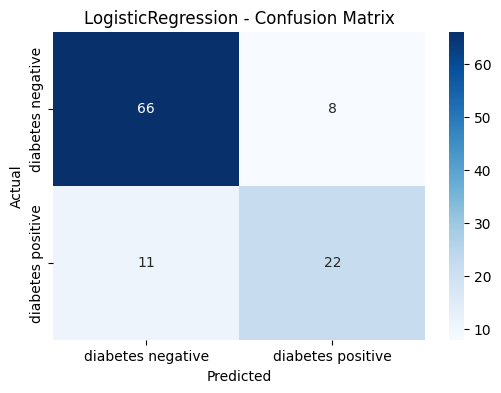

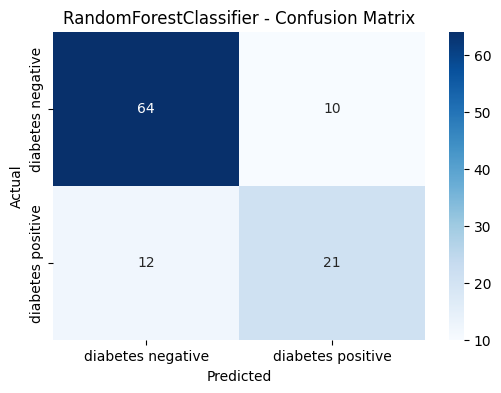

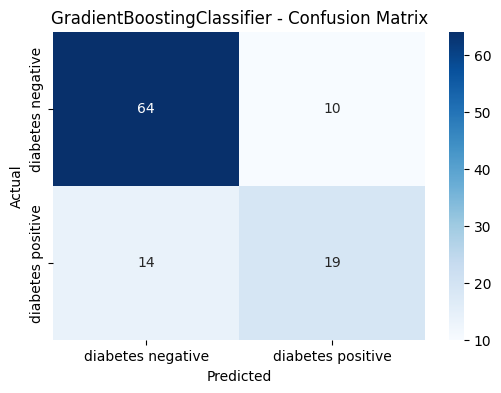

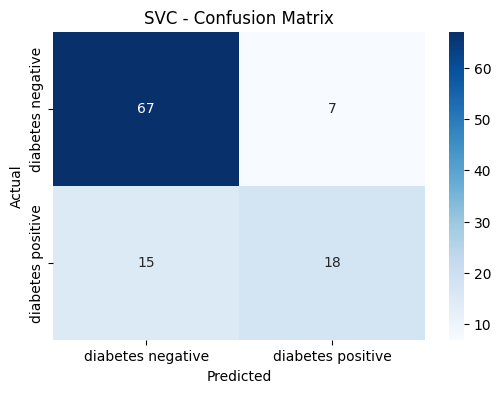

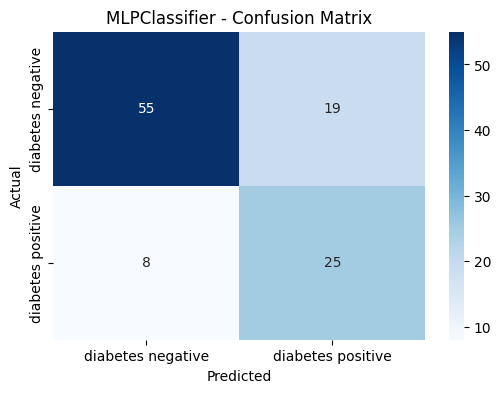

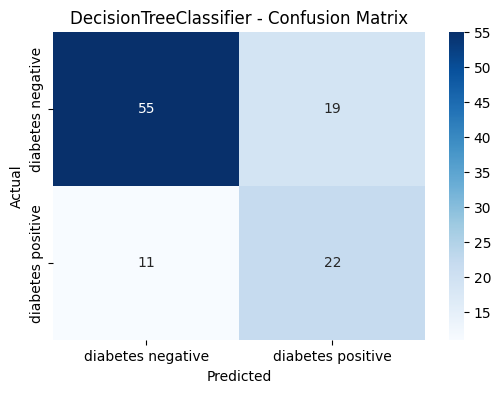

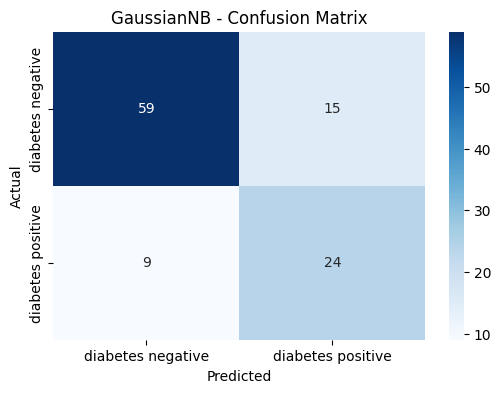

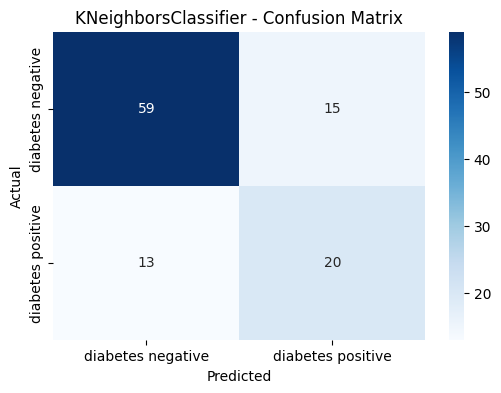

In [ ]:
# Initialize the models
models = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(probability=True),
    MLPClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier()
]

# Train and evaluate the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a custom confusion matrix with labels
    labels = ['diabetes negative', 'diabetes positive']
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(type(model).__name__ + ' - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# **Finding the best Model**

In [ ]:
# Split the dataset into features and target variable

# Initialize the models
models = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    MLPClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier()
]

# Define evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

# Evaluate the models
results = {}
for model in models:
    model_name = type(model).__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results = {}
    for metric_name, metric_func in metrics.items():
        score = metric_func(y_test, y_pred)
        model_results[metric_name] = score
    results[model_name] = model_results

# Find the best algorithm based on the evaluation metric
best_metric = 'Accuracy'  # Choose the evaluation metric to determine the best algorithm
best_algorithm = max(results, key=lambda x: results[x][best_metric])

# Print the results
for model_name, model_results in results.items():
    print(model_name)
    for metric_name, score in model_results.items():
        print(f'{metric_name}: {score}')
    print('---')

print(f'The best algorithm based on {best_metric} is: {best_algorithm}')


LogisticRegression
Accuracy: 0.822429906542056
Precision: 0.7333333333333333
Recall: 0.6666666666666666
F1 Score: 0.6984126984126984
---
RandomForestClassifier
Accuracy: 0.8037383177570093
Precision: 0.7142857142857143
Recall: 0.6060606060606061
F1 Score: 0.6557377049180327
---
GradientBoostingClassifier
Accuracy: 0.7757009345794392
Precision: 0.6551724137931034
Recall: 0.5757575757575758
F1 Score: 0.6129032258064515
---
SVC
Accuracy: 0.794392523364486
Precision: 0.72
Recall: 0.5454545454545454
F1 Score: 0.6206896551724138
---
MLPClassifier
Accuracy: 0.719626168224299
Precision: 0.5789473684210527
Recall: 0.3333333333333333
F1 Score: 0.4230769230769231
---
DecisionTreeClassifier
Accuracy: 0.7102803738317757
Precision: 0.525
Recall: 0.6363636363636364
F1 Score: 0.5753424657534246
---
GaussianNB
Accuracy: 0.7757009345794392
Precision: 0.6153846153846154
Recall: 0.7272727272727273
F1 Score: 0.6666666666666667
---
KNeighborsClassifier
Accuracy: 0.7383177570093458
Precision: 0.5714285714285